# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Supervisionada
## Project 2: Construindo um Sistema de Intervenção para Estudantes

Bem-vindo ao segundo projeto do Nanodegree de Machine Learning! Neste Notebook, alguns templates de código já foram fornecidos, e será o seu trabalho implementar funcionalidades necessárias para completar este projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código que se segue precisará de funcionalidades adicionais que você deve fornecer. Instruções serão providenciadas para cada seção e as especificações para cada implementação estarão marcadas no bloco de código com o comando `'TODO'`. Tenha certeza de ler atentamente todas as instruções!

Além do código implementado, haverá questões relacionadas ao projeto e à implementação que você deve responder. Cada seção em que você tem que responder uma questão será antecedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e escreva respostas completas nas caixas de texto subsequentes que começam com **'Resposta: '**. O projeto enviado será avaliado baseado nas respostas para cada questão e a implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas, um clique duplo na célula entra no modo de edição.

### Questão 1 - Classificação versus Regressão
*Seu objetivo neste projeto é identificar estudantes que possam precisar de intervenção antecipada antes de serem reprovados. Que tipo de problema de aprendizagem supervisionada é esse: classificação ou regressão? Por quê?*

**Resposta: **

Este é um caso que pode ser solucionado através de classificação, uma vez que se deseja categorizar os alunos que precisam de intervenção antecipada ou não.

## Observando os Dados
Execute a célula de código abaixo para carregar as bibliotecas de Python necessárias e os dados sobre os estudantes. Note que a última coluna desse conjunto de dados, `'passed'`, será nosso rótulo alvo (se o aluno foi ou não aprovado). As outras colunas são atributos sobre cada aluno.

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Ler os dados dos estudantes
student_data = pd.read_csv("student-data.csv")

#Set PANDAS to show all columns in DataFrame
#pd.set_option('display.max_columns', None)

print(student_data.head(2)) 
#print(student_data.describe())

print("Os dados dos estudantes foram lidos com êxito!")

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home  teacher   
1     GP   F   17       U     GT3       T     1     1  at_home    other   

   ...   internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0  ...         no       no       4         3      4    1    1      3        6   
1  ...        yes       no       5         3      3    1    1      3        4   

  passed  
0     no  
1     no  

[2 rows x 31 columns]
Os dados dos estudantes foram lidos com êxito!


### Implementação: Observando os Dados
Vamos começar observando o conjunto de dados para determinar quantos são os estudantes sobre os quais temos informações e entender a taxa de graduação entre esses estudantes. Na célula de código abaixo, você vai precisar calcular o seguinte:
- O número total de estudantes, `n_students`.
- O número total de atributos para cada estudante, `n_features`.
- O número de estudantes aprovados, `n_passed`.
- O número de estudantes reprovados, `n_failed`.
- A taxa de graduação da classe, `grad_rate`, em porcentagem (%).


In [2]:
# Calcule o número de estudante
n_students = student_data.shape[0]

# Calcule o número de atributos
# Uma das colunas em student_data é a variável-alvo, e não um atributo. 
n_features = student_data.drop('passed', axis=1).shape[1]

# Calcule o número de alunos aprovados
n_passed = student_data[student_data.passed == 'yes'].shape[0]

# Calcule o número de alunos reprovados
n_failed = student_data[student_data.passed == 'no'].shape[0]

# Calcule a taxa de graduação
grad_rate = (n_passed * 100) / n_students

# Imprima os resultados
print("Número total de estudantes: {}".format(n_students))
print("Número de atributos: {}".format(n_features))
print("Número de estudantes aprovados: {}".format(n_passed))
print("Número de estudantes reprovados: {}".format(n_failed))
print("Taxa de graduação: {:.2f}%".format(grad_rate))

Número total de estudantes: 395
Número de atributos: 30
Número de estudantes aprovados: 265
Número de estudantes reprovados: 130
Taxa de graduação: 67.09%


## Preparando os Dados
Nesta seção, vamos preparar os dados para modelagem, treinamento e teste.

### Identificar atributos e variáveis-alvo
É comum que os dados que você obteve contenham atributos não numéricos. Isso pode ser um problema, dado que a maioria dos algoritmos de machine learning esperam dados númericos para operar cálculos.

Execute a célula de código abaixo para separar os dados dos estudantes em atributos e variáveis-alvo e verificar se algum desses atributos é não numérico.

In [3]:
# Extraia as colunas dos atributo
feature_cols = list(student_data.columns[:-1])

# Extraia a coluna-alvo, 'passed'
target_col = student_data.columns[-1] 

# Mostre a lista de colunas
print("Colunas de atributos:\n{}".format(feature_cols))
print("\nColuna-alvo: {}".format(target_col))

# Separe os dados em atributos e variáveis-alvo (X_all e y_all, respectivamente)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Mostre os atributos imprimindo as cinco primeiras linhas
print("\nFeature values:")
print(X_all.head())

Colunas de atributos:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Coluna-alvo: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...    

### Pré-processar Colunas de Atributo

Como você pode ver, há muitas colunas não numéricas que precisam ser convertidas! Muitas delas são simplesmente `yes`/`no`, por exemplo, a coluna `internet`. É razoável converter essas variáveis em valores (binários) `1`/`0`.

Outras colunas, como `Mjob` e `Fjob`, têm mais do que dois valores e são conhecidas como variáveis categóricas. A maneira recomendada de lidar com esse tipo de coluna é criar uma quantidade de colunas proporcional aos possíveis valores (por exemplo, `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc), e assinalar `1` para um deles e `0` para todos os outros.

Essas colunas geradas são por vezes chamadas de _variáveis postiças_ (em inglês: _dummy variables_), e nós iremos utilizar a função [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para fazer essa conversão. Execute a célula de código abaixo para executar a rotina de pré-processamento discutida nesta seção.

In [4]:
def preprocess_features(X):
    ''' Pré-processa os dados dos estudantes e converte as variáveis binárias não numéricas em
        variáveis binárias (0/1). Converte variáveis categóricas em variáveis postiças. '''
    
    # Inicialize nova saída DataFrame
    output = pd.DataFrame(index = X.index)

    # Observe os dados em cada coluna de atributos 
    for col, col_data in X.iteritems():
        
        # Se o tipo de dado for não numérico, substitua todos os valores yes/no por 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # Se o tipo de dado for categórico, converta-o para uma variável dummy
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Reúna as colunas revisadas
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementação: Divisão dos Dados de Treinamento e Teste
Até agora, nós convertemos todos os atributos _categóricos_ em valores numéricos. Para o próximo passo, vamos dividir os dados (tanto atributos como os rótulos correspondentes) em conjuntos de treinamento e teste. Na célula de código abaixo, você irá precisar implementar o seguinte:
- Embaralhe aleatoriamente os dados (`X_all`, `y_all`) em subconjuntos de treinamento e teste.
  - Utilizar 300 pontos de treinamento (aproxidamente 75%) e 95 pontos de teste (aproximadamente 25%).
  - Estabelecer um `random_state` para as funções que você utiliza, se a opção existir.
  - Armazene os resultados em `X_train`, `X_test`, `y_train` e `y_test`.

In [5]:
# Importe qualquer funcionalidade adicional de que você possa precisar aqui
from sklearn.model_selection import train_test_split

#Estabeleça o número de pontos de treinamento
num_train = 300

#Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=num_train, random_state=42,stratify=y_all)

# Mostre o resultado da distribuição
print("O conjunto de treinamento tem {} amostras.".format(X_train.shape[0]))
print("O conjunto de teste tem {} amostras.".format(X_test.shape[0]))

O conjunto de treinamento tem 300 amostras.
O conjunto de teste tem 95 amostras.


## Treinando e Avaliando Modelos
Nesta seção, você irá escolher 3 modelos de aprendizagem supervisionada que sejam apropriados para esse problema e que estejam disponíveis no `scikit-learn`. Primeiro você irá discutir o raciocínio por trás da escolha desses três modelos considerando suas vantagens e desvantagens e o que você sabe sobre os dados. Depois você irá ajustar o modelo a diferentes tamanhos de conjuntos de treinamento (com 100, 200 e 300 pontos) e medir a pontuação F<sub>1</sub>. Você vai precisar preencher três tabelas (uma para cada modelo) que mostrem o tamanho do conjunto de treinamento, o tempo de treinamento, o tempo de previsão e a pontuação F<sub>1</sub> no conjunto de treinamento.

**Os seguintes modelos de aprendizagem supervisionada estão atualmente disponíveis no **[`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)** para você escolher:**
- Gaussian Naive Bayes (GaussianNB)
- Árvores de Decisão
- Métodos de agregação (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Método do gradiente estocástico (SGDC)
- Máquinas de vetores de suporte (SVM)
- Regressão logística

### Questão 2 - Aplicação dos Modelos
*Liste três modelos de aprendizagem supervisionada que são apropriadas para esse problema. Para cada modelo escolhido:*
- Descreva uma aplicação em mundo real na indústria em que o modelo pode ser aplicado. *(Talvez você precise fazer um pouco de pesquisa para responder essa questão – dê as devidas referências!)* 
- Quais são as vantagens do modelo; quando ele tem desempenho melhor? 
- Quais são as desvantagens do modelo, quando ele tem desempenho pior?
- O que faz desse modelo um bom candidato para o problema, considerando o que você sabe sobre os dados?

**Resposta: **


** RandomForestClassifier ** 

+ **_Aplicação em mundo real na indústria :_**  

Random forest é um método de aprendizagem de máquinas altamente versátil, com inúmeras aplicações que vão desde marketing até cuidados de saúde e seguros. Ele pode ser usado para modelar o impacto do marketing na aquisição, retenção e churn do cliente, ou para prever risco de doença e susceptibilidade em pacientes.


+ **_Vantagens do modelo:_** 

Random forest é capaz de regressão e classificação. Ele pode lidar com uma grande quantidade de recursos e é útil para estimar quais das suas variáveis são importantes nos dados subjacentes que estão sendo modelados.



+ **_Desvantagens do modelo:_** 

A principal limitação do algoritmo Random Forest é que um grande número de árvores pode tornar o algoritmo lento para a previsão em tempo real.


+ **_O que faz desse modelo um bom candidato:_** 

Random forest é um algoritmo de classificação supervisionado. Como o nome sugere, esse algoritmo cria a floresta com várias árvores. Em geral, quanto mais árvores na floresta, mais robusta é a floresta. Da mesma forma que no Random Forest Classifier, quanto maior o número de árvores na floresta, melhor a precisão do modelo.


+ **_Referências_**

http://blog.yhat.com/posts/random-forests-in-python.html

https://en.wikipedia.org/wiki/Random_forest

https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

http://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/


------

------

** SVM **            

+ **_Aplicação em mundo real na indústria :_**  

SVM é um algoritmo supervisionado de aprendizagem de máquinas que pode ser usado para problemas de classificação ou regressão. Ele usa uma técnica chamada kernel transformation para transformar seus dados e, em seguida, com base nessas transformações, ele encontra um limite ótimo entre as possíveis saídas. Simplificando, ele faz algumas transformações de dados extremamente complexas, então descobre como separar seus dados com base nos labels ou nas saídas que você definiu.

  SVM pode ser aplicado em diversas áreas como categorização de texto, classificação de imagens, reconhecimento de caracteres manuscritos.
  Na bioinformática o SVM é utilizado na classificação de proteínas e na classificação de doenças como câncer.


+ **_Vantagens do modelo:_** 

Os SVMs são efetivos quando o número de variáveis é consideravelmente grande, mesmo que este seja maior que o número de amostras.

Os dados não-lineares também podem ser classificados usando hiperplanos personalizados construídos usando o truque do kernel.

É um modelo robusto para resolver problemas de previsão, pois maximiza a margem.


+ **_Desvantagens do modelo:_**

A maior limitação do SVM é a escolha do kernel. A má escolha do kernel pode levar a um aumento do percentual de erros na predição.

Os SVMs têm bom desempenho de generalização, mas podem ser extremamente lentos na fase de teste.

Os SVMs possuem alta complexidade algorítmica e requisitos de memória extensivos devido ao uso de programação quadrática.

+ **_O que faz desse modelo um bom candidato:_** Uma vez que estamos tentando resolver um problema de classificação binária, o SVM pode ser uma boa escolha por maximizar a margem de hiperplano.


+ **_Referências_**

http://www.yaksis.com/posts/why-use-svm.html

https://en.wikipedia.org/wiki/Support_vector_machine

http://web.mit.edu/zoya/www/SVM.pdf

https://www.analyticsvidhya.com/blog/2015/10/understaing-support-vector-machine-example-code/

http://condor.depaul.edu/ntomuro/courses/578/notes/SVM-overview.pdf

http://dataaspirant.com/2017/01/13/support-vector-machine-algorithm/

------

**DecisionTreeClassifier**      

+ **_Aplicação em mundo real na indústria :_** 

Decision Trees podem ser aplicados para a classificação da qualidade de grãos, como por exemplo o café.

+ **_Vantagens do modelo:_** 


Árvores de decisão são resultantes de um conjunto de regras, isto é, seguem a mesma abordagem que os humanos geralmente seguem ao tomar decisões, portanto são fáceis de explicar,  

A interpretação de um modelo de Árvore de Decisão complexa pode ser simplificada por suas visualizações. Mesmo uma pessoa ingênua pode entender a lógica.

O número de hiper-parâmetros a serem sintonizados é quase nulo.

+ **_Desvantagens do modelo:_**

Existe uma alta probabilidade de overfitting na Árvore de Decisão.
Geralmente, proporciona baixa precisão de previsão para um conjunto de dados em comparação com outros algoritmos de machine learning.

O ganho de informação em uma árvore de decisão com variáveis categóricas dá uma resposta tendenciosa para atributos com maior número de categorias.

Os cálculos podem se tornar complexos quando há muitos rótulos à serem classificados.

+ **_O que faz desse modelo um bom candidato:_**

O motivo geral de usar Decision Tree é criar um modelo de treinamento que possa usar para prever a classe ou o valor das variáveis alvo, aprendendo as regras de decisão inferidas a partir de dados anteriores (dados de treinamento).

Por ser um modelo de fácil entendimento, se torna eficaz ao explicar seu comportamento e os insights gerados para leigos.


+ **_Referências_** 

http://www.cbcb.umd.edu/~salzberg/docs/murthy_thesis/survey/node32.html

http://what-when-how.com/artificial-intelligence/decision-tree-applications-for-data-modelling-artificial-intelligence/


https://en.wikipedia.org/wiki/Decision_tree_learning

http://dataaspirant.com/2017/01/30/how-decision-tree-algorithm-works/

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.90.5327&rep=rep1&type=pdf

------
**AdaBoostClassifier**      

+ **_Aplicação em mundo real na indústria :_** 
    
    
O AdaBoost, abreviação de "Adaptive Boosting", é um meta-algoritmo de Machine Learning formulado por Yoav Freund e Robert Schapire, que ganhou o Prêmio Gödel em 2003 por seu trabalho. 

Ele pode ser usado em conjunto com muitos outros tipos de algoritmos de aprendizagem para melhorar seu desempenho. A saída dos outros algoritmos de aprendizagem ("Weak Learners) é combinada em uma soma ponderada que representa a saída final do classificador reforçado.

O AdaBoost é adaptável no sentido de que weak learners subseqüentes são modificados em favor de instâncias mal classificadas por classificadores anteriores.

O AdaBoost é sensível a dados ruidosos e outliers. Em alguns problemas, pode ser menos suscetível ao problema de superposição do que outros algoritmos de aprendizado. Os aprendentes individuais podem ser fracos, mas enquanto o desempenho de cada um for um pouco melhor do que o adivinhar aleatoriamente (por exemplo, sua taxa de erro é menor que 0,5 para a classificação binária), o modelo final pode ser comprovado para convergir para um strong learner.

+ **_Vantagens do modelo:_** 

Eficiente computacionalmente.
Versatil, uma grande quantidade de classificadores podem ser utilizados com AdaBoost.

+ **_Desvantagens do modelo:_**

O aprendiz fraco não deve ser muito complexo - para evitar overfitting.
O AdaBoost é sensível a dados ruidosos e outliers.

+ **_O que faz desse modelo um bom candidato:_**

Como este algoritmo tem como objetivo utilizar classificadores ("weak learners") para melhorar a acuracidade de um modelo, este pode ser um bom candidato.

+ **_Referências_**

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5540979/

http://www.inf.fu-berlin.de/inst/ag-ki/adaboost4.pdf

http://mccormickml.com/2013/12/13/adaboost-tutorial/

http://www.ritchieng.com/machine-learning-ensemble-of-learners-adaboost/

------
**GaussianNB**           
+ **_Aplicação em mundo real na indústria :_** 


Naive Bayes apresenta bons resultados em utilização para análise textual de dados e processamento de linguagem natural.

+ **_Vantagens do modelo:_** 

Naive Bayes é um algoritmo rápido e altamente escalável.
Pode ser usado para classificação binária e de multiplas classes.
Pode ser facilmente treinado em pequenos conjuntos de dados.

+ **_Desvantagens do modelo:_**

Considera que todos as features não estão relacionadas, portanto, não pode aprender a relação entre elas.

+ **_O que faz desse modelo um bom candidato:_**

Facilidade de implementação.
Pode ser facilmente treinado em pequenos conjuntos de dados. 

+ **_Referências_**

http://dataaspirant.com/2017/02/06/naive-bayes-classifier-machine-learning/

---

https://docs.microsoft.com/en-us/azure/machine-learning/machine-learning-algorithm-choice




### Configuração
Execute a célula de código abaixo para inicializar três funções de ajuda que você pode utilizar para treinar e testar os três modelos de aprendizagem supervisionada que você escolheu acima. As funções são as seguintes:
- `train_classifier` - recebe como parâmetro um classificador e dados de treinamento e ajusta o classificador aos dados.
- `predict_labels` - recebe como parâmetro um classificador ajustado, atributos e rótulo alvo e faz estimativas utilizando a pontuação do F<sub>1</sub>.
- `train_predict` - recebe como entrada um classificador, e dados de treinamento e teste, e executa `train_clasifier` e `predict_labels`.
 - Essa função vai dar a pontuação F<sub>1</sub> tanto para os dados de treinamento como para os de teste, separadamente.

In [6]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print("O modelo foi treinado em {:.4f} segundos".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print("As previsões foram feitas em {:.4f} segundos.".format(end - start))
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print("Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Treina o classificador
    train_classifier(clf, X_train, y_train)
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print("Pontuação F1 para o conjunto de treino: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print("Pontuação F1 para o conjunto de teste: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

### Implementação: Métricas de Desempenho do Modelo
Com as funções acima, você vai importar os três modelos de aprendizagem supervisionada de sua escolha e executar a função `train_prediction` para cada um deles. Lembre-se de que você vai precisar treinar e usar cada classificador para três diferentes tamanhos de conjuntos de treinamentos: 100, 200 e 300 pontos. Então você deve ter 9 saídas diferentes abaixo – 3 para cada modelo utilizando cada tamanho de conjunto de treinamento. Na célula de código a seguir, você deve implementar o seguinte:
- Importe os três modelos de aprendizagem supervisionada que você escolheu na seção anterior.
- Inicialize os três modelos e armazene eles em `clf_A`, `clf_B` e `clf_C`.
 - Defina um `random_state` para cada modelo, se a opção existir.
 - **Nota:** Utilize as configurações padrão para cada modelo – você vai calibrar um modelo específico em uma seção posterior.
- Crie diferentes tamanhos de conjuntos de treinamento para treinar cada modelo.
 - *Não embaralhe e distribua novamente os dados! Os novos pontos de treinamento devem ser tirados de `X_train` e `y_train`.*
- Treine cada modelo com cada tamanho de conjunto de treinamento e faça estimativas com o conjunto de teste (9 vezes no total).  
**Nota:** Três tabelas são fornecidas depois da célula de código a seguir, nas quais você deve anotar seus resultados.

In [7]:
#Importe os três modelos de aprendizagem supervisionada do sklearn

from sklearn.ensemble import RandomForestClassifier  # Métodos de agregação (Random Forest)
from sklearn import svm                              # Máquinas de vetores de suporte (SVM) 
from sklearn.tree import DecisionTreeClassifier      # Árvores de Decisão
from sklearn.ensemble import AdaBoostClassifier      # Métodos de agregação ( AdaBoost )
from sklearn.naive_bayes import GaussianNB           # Gaussian Naive Bayes (GaussianNB)

#Inicialize os três modelos
clf_A = RandomForestClassifier(random_state=0)
clf_B = svm.SVC(random_state=0)
clf_C = DecisionTreeClassifier(random_state=0)
clf_D = AdaBoostClassifier(random_state=0)
clf_E = GaussianNB()

classifiers = [clf_A, clf_B, clf_C,clf_D,clf_E]
train_sets = [100, 200, 300]

#Executar a função 'train_predict' para cada classificador e cada tamanho de conjunto de treinamento
for clf in classifiers:
    print("\n############### {} #######################".format(clf.__class__.__name__))
    for n_train in train_sets:
        train_predict(clf, X_train[:n_train], y_train[:n_train], X_test, y_test)
        print("_____________________________________________________")
        


############### RandomForestClassifier #######################
Treinando um RandomForestClassifier com 100 pontos de treinamento. . .
O modelo foi treinado em 0.0353 segundos
As previsões foram feitas em 0.0037 segundos.
Pontuação F1 para o conjunto de treino: 0.9848.
As previsões foram feitas em 0.0034 segundos.
Pontuação F1 para o conjunto de teste: 0.6984.
_____________________________________________________
Treinando um RandomForestClassifier com 200 pontos de treinamento. . .
O modelo foi treinado em 0.0361 segundos
As previsões foram feitas em 0.0040 segundos.
Pontuação F1 para o conjunto de treino: 0.9845.
As previsões foram feitas em 0.0037 segundos.
Pontuação F1 para o conjunto de teste: 0.7368.
_____________________________________________________
Treinando um RandomForestClassifier com 300 pontos de treinamento. . .
O modelo foi treinado em 0.0380 segundos
As previsões foram feitas em 0.0042 segundos.
Pontuação F1 para o conjunto de treino: 0.9828.
As previsões foram feita

### Resultados Tabulados
Edite a célula abaixo e veja como a tabela pode ser desenhada em [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). Você deve salvar seus resultados abaixo nas tabelas fornecidas.

** Classificador 1 - RandomForestClassifier**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |       0.0355         |          0.0425             |          0.9922            |        0.6614        |
| 200                                |       0.0359         |          0.0431             |          0.9964            |        0.7536        |
| 300                                |       0.0375         |          0.0449             |          0.9927            |        0.7407        |

** Classificador 2 - SVM**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |      0.0048          |           0.0114            |          0.8777            |       0.7746         |
| 200                                |      0.0122          |           0.0269            |          0.8679            |       0.7815         |
| 300                                |      0.0169          |           0.0565            |          0.8761            |       0.7838         |

** Classificador 3 - DecisionTreeClassifier**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |       0.0026         |        0,0040               |           1.0000           |         0.6154       |
| 200                                |       0.0041         |        0,0060               |           1.0000           |         0.7040       |
| 300                                |       0.0054         |        0,0075               |           1.0000           |         0.6102       |

** Classificador 4 - AdaBoostClassifier**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |       0.1354         |        0.2498               |           0.9481           |         0.7669       |
| 200                                |       0.1404         |        0.2586               |           0.8927           |         0.8281       |
| 300                                |       0.1375         |        0.2759               |           0.8637           |         0.7820       |
** Classificador 5 - Naive Bayes (GaussianNB) **

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |       0.0020         |        0.0070               |           0.8467           |         0.8029       |
| 200                                |       0.0026         |        0.0068               |           0.8406           |         0.7244       |
| 300                                |       0.0033         |        0.0066               |           0.8038           |         0.7634       |



## Escolhendo o Melhor Modelo
Nesta seção final, você irá escolher dos três modelos de aprendizagem supervisionada o *melhor* para utilizar os dados dos estudantes. Você então executará um busca em matriz otimizada para o modelo em todo o conjunto de treinamento (`X_train` e `y_train`) ao calibrar pelo menos um parâmetro, melhorando em comparação a pontuação F<sub>1</sub> do modelo não calibrado. 

### Questão 3 - Escolhendo o Melhor Modelo
*Baseando-se nos experimentos que você executou até agora, explique em um ou dois parágrafos ao conselho de supervisores qual modelo que você escolheu como o melhor. Qual modelo é o mais apropriado baseado nos dados disponíveis, recursos limitados, custo e desempenho?*

Conforme revisão anterior, peço que você considere também o tempo necessário para treinar o modelo e realizar previsões ao discutir qual modelo você escolheu para calibrar.


**Resposta: **

   Por apresentar uma boa performance de tempo de treinamento 0.0169 segundos e tempo total de 0.0565 segundos para um conjunto de treinamento de 300 observações, pode se considerar o SVM como um modelo robusto para a utilização neste conjunto de dados. 
  Sua performance como modelo preditivo é apresentado através dos F1 scores iniciais, isto é, sem utilização de hiperparametros, de 0.8761 para treinamento e 0.7838 para testes.
  
  É importante destacar que o tempo de treinamento e testes dos modelos GaussianNB e DecisionTreeClassifier foram melhores, entretanto como a premissa do exercicio era a não utilização de hiperparametros, estes não apresentaram F1 scores melhores que o SVM, sendo assim este eleito o "melhor" modelo nesta etapa.

### Questão 4 – O Modelo para um Leigo
*Em um ou dois parágrafos, explique para o conselho de supervisores, utilizando termos leigos, como o modelo final escolhido deve trabalhar. Tenha certeza que você esteja descrevendo as melhores qualidades do modelo, por exemplo, como o modelo é treinado e como ele faz uma estimativa. Evite jargões técnicos ou matemáticos, como descrever equações ou discutir a implementação do algoritmo.*

**Resposta: **

Uma máquina de vetores de suporte (SVM, do inglês: support vector machine) é um conceito na ciência da computação para um conjunto de métodos do aprendizado supervisionado que analisam os dados e reconhecem padrões, usado para classificação e análise de regressão. O SVM padrão toma como entrada um conjunto de dados e prediz, para cada entrada dada, qual de duas possíveis classes a entrada faz parte.

Dados um conjunto de exemplos de treinamento, cada um marcado como pertencente a uma de duas categorias, um algoritmo de treinamento do SVM constrói um modelo que atribui novos exemplos a uma categoria ou outra. Um modelo SVM é uma representação de exemplos como pontos no espaço, mapeados de maneira que os exemplos de cada categoria sejam divididos por um espaço claro que seja tão amplo quanto possível. Os novos exemplos são então mapeados no mesmo espaço e preditos como pertencentes a uma categoria baseados em qual o lado do espaço eles são colocados.

Em outras palavras, o que uma SVM faz é encontrar uma linha de separação, mais comumente chamada de hiperplano entre dados de duas classes. Essa linha busca maximizar a distância entre os pontos mais próximos em relação a cada uma das classe:

Entretanto, se os dados de treinamento não forem linearmente separáveis, o hiperplano obtido pelo classificador pode ter baixo poder de generalização, mesmo que o hiperplano seja determinado de maneira ótima. Assim, para melhor a separabilidade linear, o espaço original é mapeado em um espaço de dimensão mais alta conhecido como espaço de características atráves de um metodo chamado kernel trick. 


### Implementação: Calibrando o Modelo
Calibre o modelo escolhido. Utilize busca em matriz (`GridSearchCV`) com, pelo menos, um parâmetro importante calibrado com, pelo menos, 3 valores diferentes. Você vai precisar utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você deve implementar o seguinte:
- Importe [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Crie o dicionário de parâmetros que você deseja calibrar para o modelo escolhido.
 - Examplo: `parameters = {'parameter' : [list of values]}`.
- Inicialize o classificador que você escolheu e armazene-o em `clf`.
- Crie a função de pontuação F<sub>1</sub> utilizando `make_scorer` e armazene-o em `f1_scorer`.
 - Estabeleça o parâmetro `pos_label` para o valor correto!
- Execute uma busca em matriz no classificador `clf` utilizando o `f1_scorer` como método de pontuação e armazene-o em `grid_obj`.
- Treine o objeto de busca em matriz com os dados de treinamento (`X_train`, `y_train`) e armazene-o em `grid_obj`.

In [8]:
#Importe 'GridSearchCV' e 'make_scorer'
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

    
#Crie a lista de parâmetros que você gostaria de calibrar
parameters = [
    {'C': [0.1, 1, 10], 'kernel': ['linear']},
    {'C': [0.1, 1, 10], 'degree':[1, 2, 3], 'kernel': ['poly']},
    {'C': [0.1, 1, 10], 'gamma': [0.5, 0.1, 0.01], 'kernel': ['rbf']}
]

#Inicialize o classificador
clf = svm.SVC(random_state=42,kernel='rbf')

#Faça uma função de pontuação f1 utilizando 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label="yes")

# Execute uma busca em matriz no classificador utilizando o f1_scorer como método de pontuação
grid_obj = GridSearchCV(clf, parameters,scoring=f1_scorer,cv=9)

# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e encontre os parâmetros ótimos
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

print(clf)
# Reporte a pontuação final F1 para treinamento e teste depois de calibrar os parâmetrosprint "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print("O modelo calibrado tem F1 de {:.4f} no conjunto de treinamento.".format(predict_labels(clf, X_train, y_train)))
print("O modelo calibrado tem F1 de {:.4f} no conjunto de teste.".format(predict_labels(clf, X_test, y_test)))

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
As previsões foram feitas em 0.0085 segundos.
O modelo calibrado tem F1 de 0.8319 no conjunto de treinamento.
As previsões foram feitas em 0.0032 segundos.
O modelo calibrado tem F1 de 0.7947 no conjunto de teste.


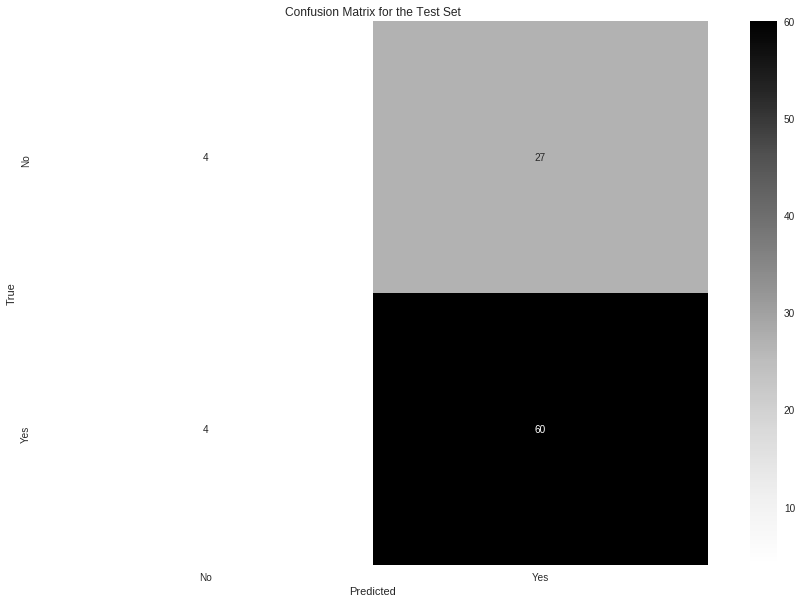

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

cm_test = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(15,10))
sns.heatmap(cm_test, annot=True, cmap='Greys', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for the Test Set')
plt.ylabel('True')
plt.xlabel('Predicted')

### Questão 5 - Pontuação F<sub>1</sub> Final
*Qual é a pontuação F<sub>1</sub> do modelo final para treinamento e teste? Como ele se compara ao modelo que não foi calibrado?*

**Resposta: ** A pontuação F1 do modelo final foi de 0.8423 no conjunto de treinamento e 0.7838 no conjunto de teste. 
   Apesar de utilizado o GridSearchCV com vários parâmetros e o modelo ter levado muito mais tempo de treinamento, não se obteve ganho de pontuação se comparado ao que não foi calibrado no exercício anterior.
 

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando o iPython Nothebook como um document HTML. Você pode fazer isso utilizando o menu acima e navegando para  
**File -> Download as -> HTML (.html)**. Inclua a documentação final junto com o notebook para o envio do seu projeto.